## INTEGRANTES

OZIEL IMANOL LEMUS MONTELONGO
BRAULIO ALEJANDRO NAVARRETE HORTA
DONOVAN VINCE LARA ALVARADO
ALBERTO JUAREZ AVALOS

In [392]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

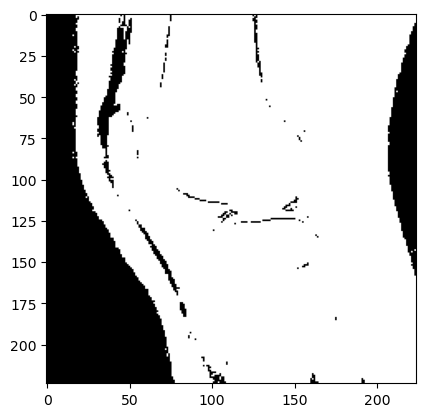

In [393]:
imagen_gris = cv2.imread('./imgs/rodilla.jfif', cv2.IMREAD_GRAYSCALE)

umbral_max = 255
umbral_min = 15

imagen_cutanea = cv2.inRange(imagen_gris, umbral_min, umbral_max)

imagenSegmentadaPorPiel = cv2.cvtColor(imagen_cutanea, cv2.COLOR_BGR2RGB)

plt.imshow(imagen_cutanea, cmap="gray")

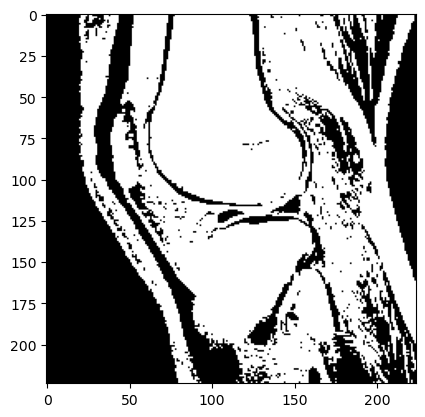

In [394]:
umbral_max = 230
umbral_min = 80

imagen_musculos = cv2.inRange(imagen_gris, umbral_min, umbral_max)

imagenSegmentadaPorTejido = cv2.cvtColor(imagen_musculos, cv2.COLOR_BGR2RGB)

plt.imshow(imagen_musculos, cmap="gray")

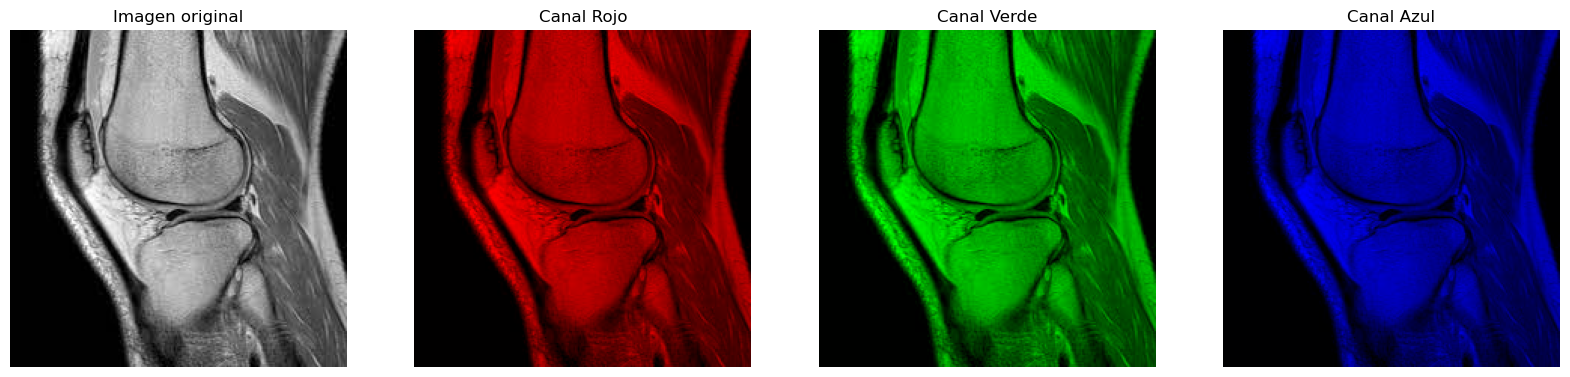

In [395]:
img_rgb = cv2.cvtColor(imagen_gris, cv2.COLOR_BGR2RGB)

# Crear copias de la imagen para aislar cada canal
img_R = img_rgb.copy()
img_G = img_rgb.copy()
img_B = img_rgb.copy()

# Aislar el canal R
img_R[:, :, 1] = 0  # G
img_R[:, :, 2] = 0  # B

# Aislar el canal G
img_G[:, :, 0] = 0  # R
img_G[:, :, 2] = 0  # B

# Aislar el canal B
img_B[:, :, 0] = 0  # R
img_B[:, :, 1] = 0  # G

# Visualizar las imágenes
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

ax[0].imshow(img_rgb)
ax[0].set_title("Imagen original")
ax[0].axis('off')

ax[1].imshow(img_R)
ax[1].set_title("Canal Rojo")
ax[1].axis('off')

ax[2].imshow(img_G)
ax[2].set_title("Canal Verde")
ax[2].axis('off')

ax[3].imshow(img_B)
ax[3].set_title("Canal Azul")
ax[3].axis('off')

plt.show()

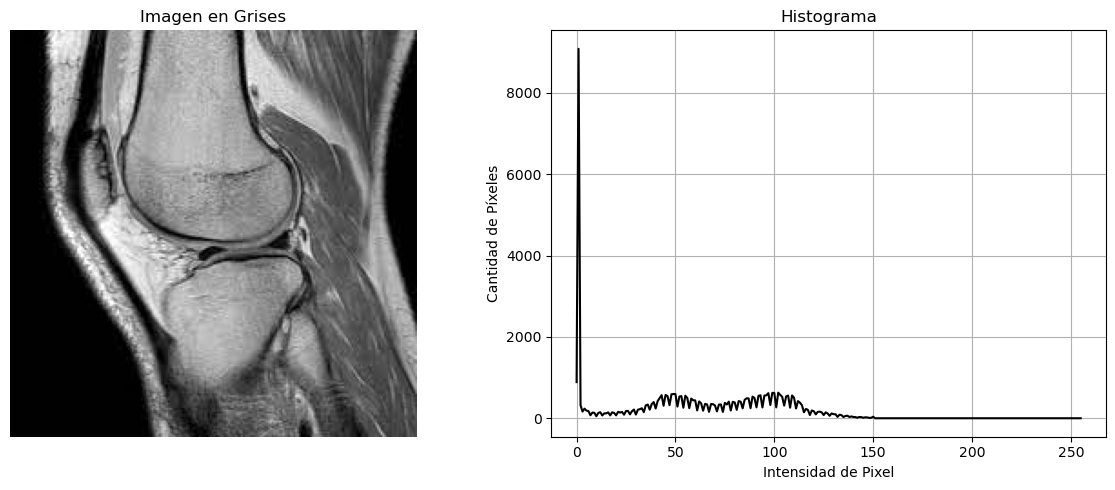

In [396]:
imagen_G_gris = cv2.cvtColor(img_G, cv2.COLOR_RGB2GRAY)

hist = cv2.calcHist([imagen_G_gris], [0], None, [256], [0, 256])

# Visualizar la imagen y su histograma
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Mostrar la imagen en escala de grises
ax[0].imshow(imagen_G_gris, cmap='gray')
ax[0].set_title("Imagen en Grises")
ax[0].axis('off')

# Mostrar el histograma
ax[1].plot(hist, color='black')
ax[1].set_title("Histograma")
ax[1].set_xlabel("Intensidad de Pixel")
ax[1].set_ylabel("Cantidad de Píxeles")
ax[1].grid(True)

plt.tight_layout()
plt.show()

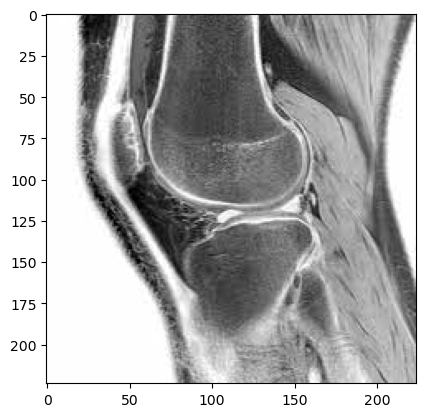

In [397]:
result_not = cv2.bitwise_not(imagen_G_gris)

plt.imshow(result_not, cmap = 'gray')

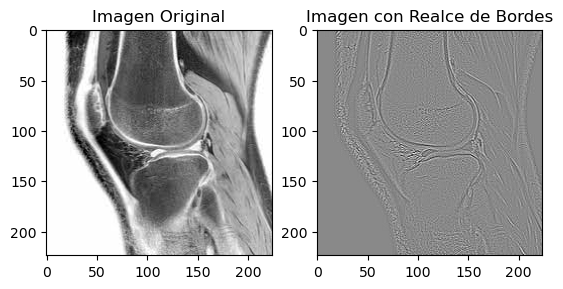

In [398]:
laplacian = cv2.Laplacian(result_not, cv2.CV_64F)
plt.subplot(1, 2, 1)
plt.imshow(result_not, cmap='gray')
plt.title('Imagen Original')
plt.subplot(1, 2, 2)
plt.imshow(laplacian, cmap='gray')
plt.title('Imagen con Realce de Bordes')
plt.show()

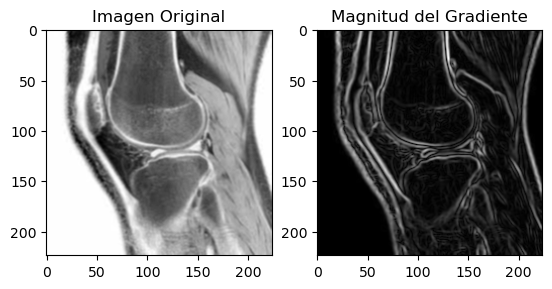

In [399]:
blurred = cv2.GaussianBlur(result_not, (3, 3), 0)

sobel_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=5)
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
plt.subplot(1, 2, 1)
plt.imshow(blurred, cmap='gray')
plt.title('Imagen Original')
plt.subplot(1, 2, 2)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Magnitud del Gradiente')
plt.show()

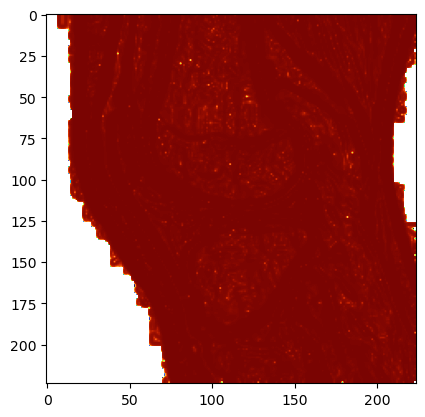

In [400]:
result_not = cv2.bitwise_not(gradient_magnitude)

plt.imshow(result_not, cmap = 'turbo')

(224, 224)
[[   0.            0.            0.         ... 1879.
  1841.          255.        ]
 [   0.            0.            0.         ... 1996.27596894
  1963.6848744   611.        ]
 [   0.            0.            0.         ... 2269.78981534
  2187.95887178  767.        ]
 ...
 [   0.            0.            0.         ...  660.79058639
   539.86136979  481.        ]
 [   0.            0.            0.         ...  584.46016451
   503.91765707  427.        ]
 [   0.            0.            0.         ...  519.
   435.          255.        ]]


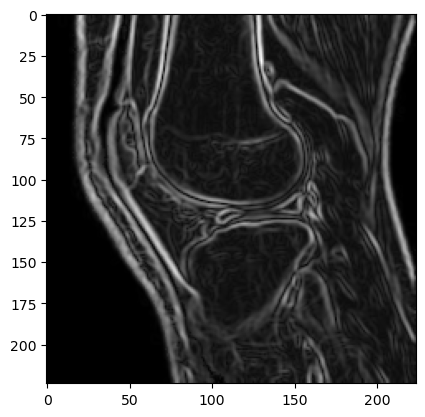

In [401]:
#originalPlus1 = cv2.add(imagen_cutanea,gradient_magnitude)
print(imagen_cutanea.shape)
res = gradient_magnitude + imagen_cutanea

#result_not = cv2.bitwise_not(originalPlus1)
#down_width = 562
#down_height = 648
#down_points = (down_width,down_height)

#imagen_cutanea_escalada = cv2.resize(imagen_cutanea, down_points, interpolation=cv2.INTER_LINEAR)
#gradient_magnitude_escalada = cv2.resize(gradient_magnitude, down_points, interpolation=cv2.INTER_LINEAR)

#result_and = cv2.bitwise_and(imagen_cutanea_escalada, gradient_magnitude_escalada)

#plt.imshow(result_and, cmap = 'gray')
#result_not = cv2.bitwise_not(originalPlus1)
print(res)
plt.imshow(res, cmap="gray")







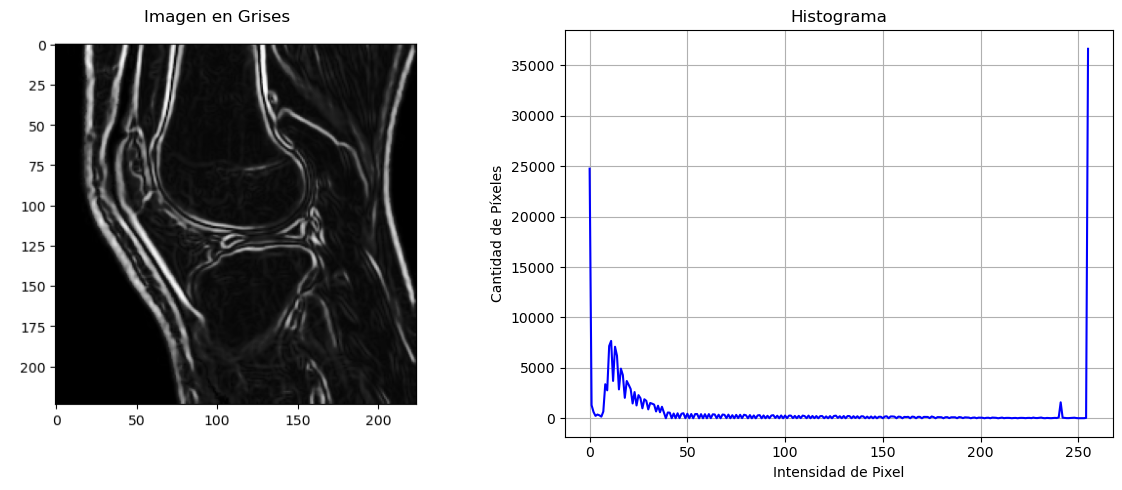

In [402]:
hueso_gris = cv2.imread('./imgs/hueso.png', cv2.IMREAD_GRAYSCALE)

img_rgb = cv2.cvtColor(hueso_gris, cv2.COLOR_BGR2RGB)


imagen_G_gris = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

hist = cv2.calcHist([imagen_G_gris], [0], None, [256], [0, 256])

# Visualizar la imagen y su histograma
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Mostrar la imagen en escala de grises
ax[0].imshow(imagen_G_gris, cmap='gray')
ax[0].set_title("Imagen en Grises")
ax[0].axis('off')

# Mostrar el histograma
ax[1].plot(hist, color='blue')
ax[1].set_title("Histograma")
ax[1].set_xlabel("Intensidad de Pixel")
ax[1].set_ylabel("Cantidad de Píxeles")
ax[1].grid(True)

plt.tight_layout()
plt.show()

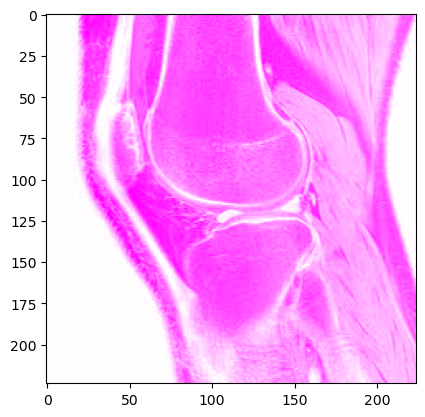

In [403]:
result_not = cv2.bitwise_not(img_G)

plt.imshow(result_not, cmap = 'copper')

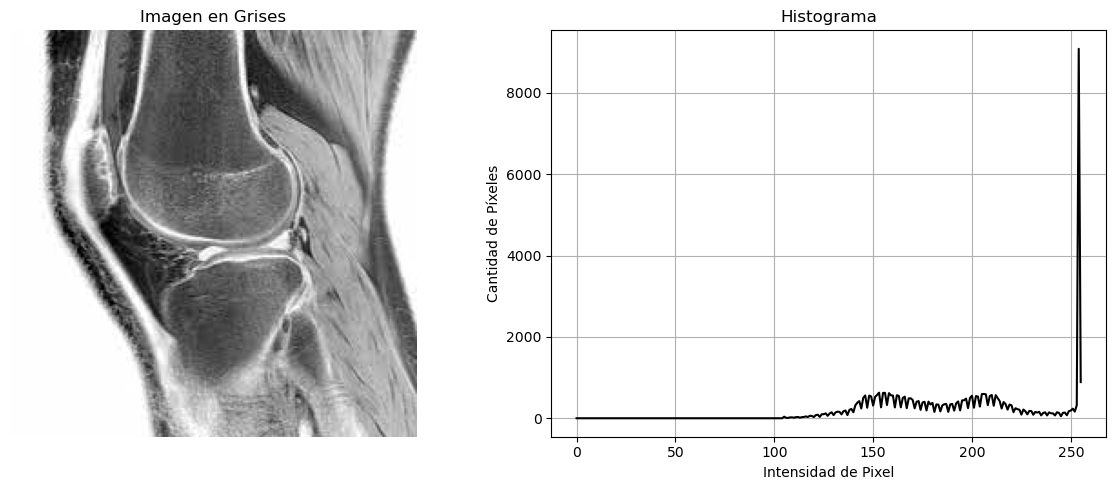

In [404]:
imagen_G_gris = cv2.cvtColor(result_not, cv2.COLOR_RGB2GRAY)

hist = cv2.calcHist([imagen_G_gris], [0], None, [256], [0, 256])

# Visualizar la imagen y su histograma
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Mostrar la imagen en escala de grises
ax[0].imshow(imagen_G_gris, cmap='gray')
ax[0].set_title("Imagen en Grises")
ax[0].axis('off')

# Mostrar el histograma
ax[1].plot(hist, color='black')
ax[1].set_title("Histograma")
ax[1].set_xlabel("Intensidad de Pixel")
ax[1].set_ylabel("Cantidad de Píxeles")
ax[1].grid(True)

plt.tight_layout()
plt.show()

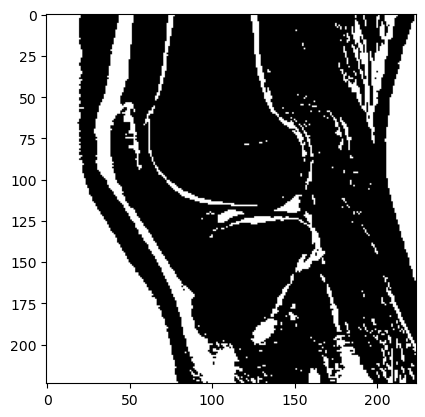

In [405]:
umbral_max = 255
umbral_min = 216

imagen_hueso = cv2.inRange(imagen_G_gris, umbral_min, umbral_max)

imagenSegmentadaPorHueso2 = cv2.cvtColor(imagen_hueso, cv2.COLOR_BGR2RGB)

plt.imshow(imagen_hueso, cmap="gray")

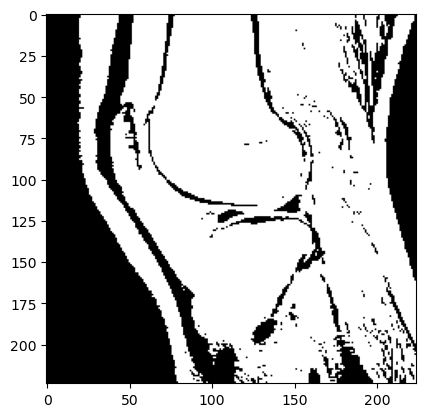

In [406]:
result_not2 = cv2.bitwise_not(imagenSegmentadaPorHueso2)

plt.imshow(result_not2, cmap = 'gray')
imagen_tejido = result_not2

(-0.5, 223.5, 223.5, -0.5)

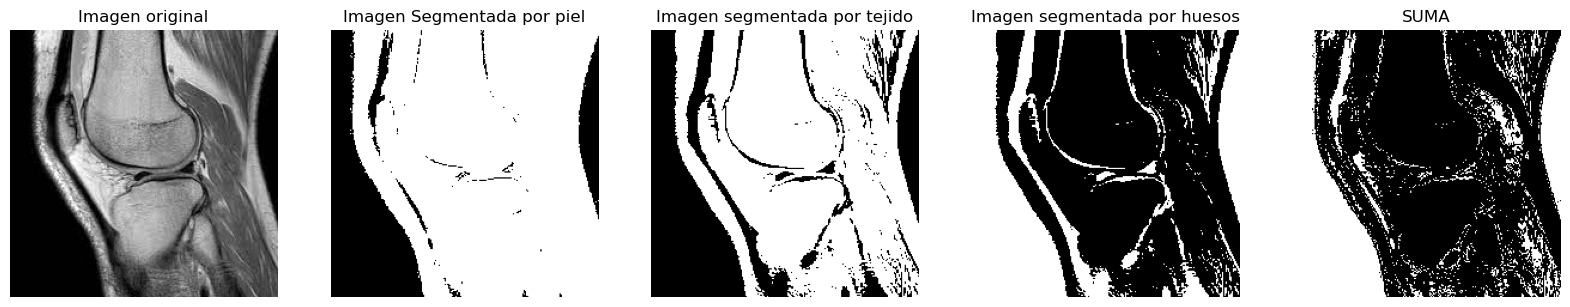

In [407]:
imagen_gris = cv2.imread('./imgs/rodilla.jfif', cv2.IMREAD_GRAYSCALE)
img_rgb = cv2.cvtColor(imagen_gris, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 5, figsize=(20, 5))

suma1 = imagen_cutanea + imagen_musculos
sumaTotal = suma1 + imagen_hueso

ax[0].imshow(img_rgb)
ax[0].set_title("Imagen original")
ax[0].axis('off')

ax[1].imshow(imagenSegmentadaPorPiel)
ax[1].set_title("Imagen Segmentada por piel")
ax[1].axis('off')

ax[2].imshow(result_not2)
ax[2].set_title("Imagen segmentada por tejido")
ax[2].axis('off')

ax[3].imshow(imagenSegmentadaPorHueso2)
ax[3].set_title("Imagen segmentada por huesos")
ax[3].axis('off')

ax[4].imshow(sumaTotal, cmap="gray")
ax[4].set_title("SUMA")
ax[4].axis('off')


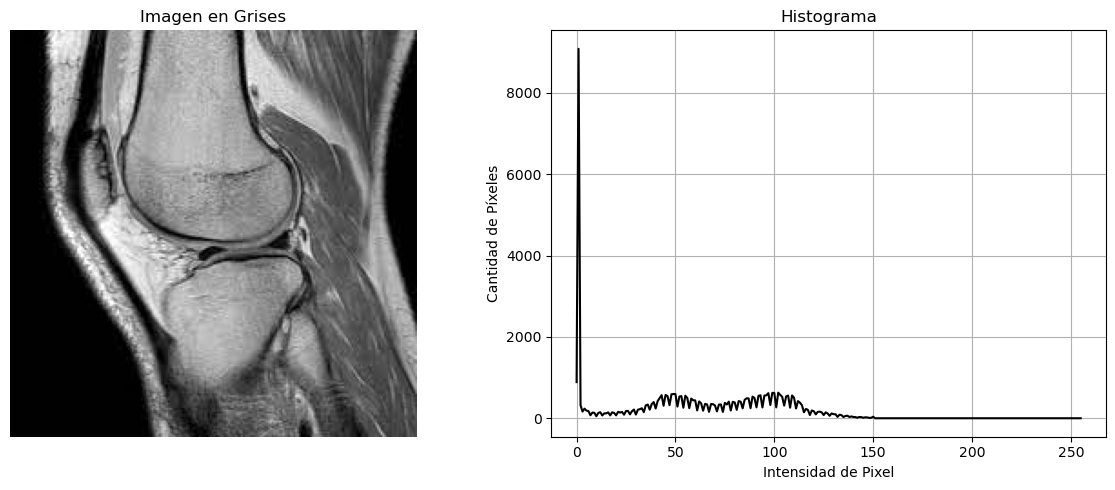

In [408]:
imagen_G_gris = cv2.cvtColor(img_G, cv2.COLOR_RGB2GRAY)

hist = cv2.calcHist([imagen_G_gris], [0], None, [256], [0, 256])

# Visualizar la imagen y su histograma
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Mostrar la imagen en escala de grises
ax[0].imshow(imagen_G_gris, cmap='gray')
ax[0].set_title("Imagen en Grises")
ax[0].axis('off')

# Mostrar el histograma
ax[1].plot(hist, color='black')
ax[1].set_title("Histograma")
ax[1].set_xlabel("Intensidad de Pixel")
ax[1].set_ylabel("Cantidad de Píxeles")
ax[1].grid(True)

plt.tight_layout()
plt.show()

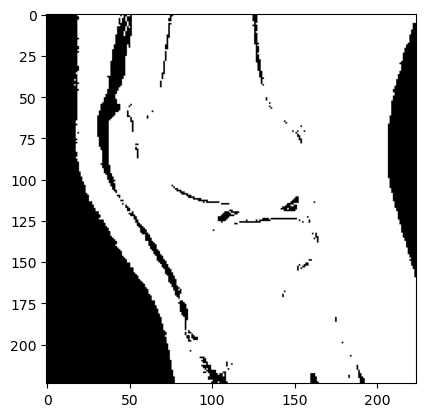

In [409]:
umbral_max = 255
umbral_min = 15

imagen_cutanea2 = cv2.inRange(imagen_G_gris, umbral_min, umbral_max)

plt.imshow(imagen_cutanea2, cmap="gray")

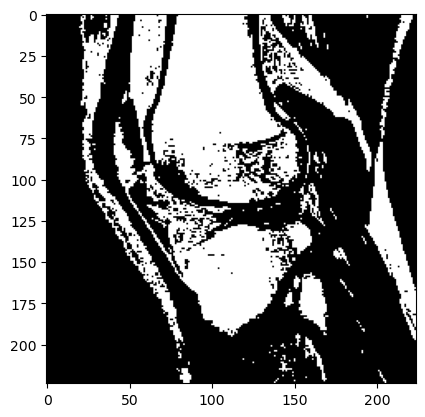

In [410]:
umbral_max = 125
umbral_min = 80

imagen_hueso2 = cv2.inRange(imagen_G_gris, umbral_min, umbral_max)

plt.imshow(imagen_hueso2, cmap="gray")

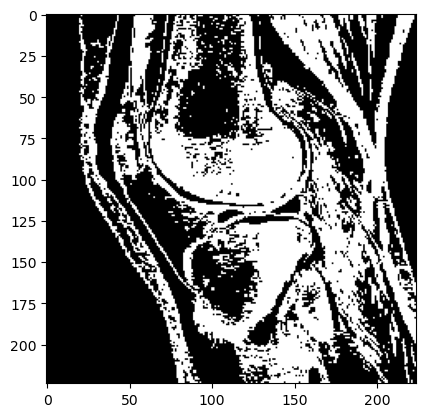

In [411]:
umbral_max = 100
umbral_min = 50

imagen_tejido2 = cv2.inRange(imagen_G_gris, umbral_min, umbral_max)

plt.imshow(imagen_tejido2, cmap="gray")

(-0.5, 223.5, 223.5, -0.5)

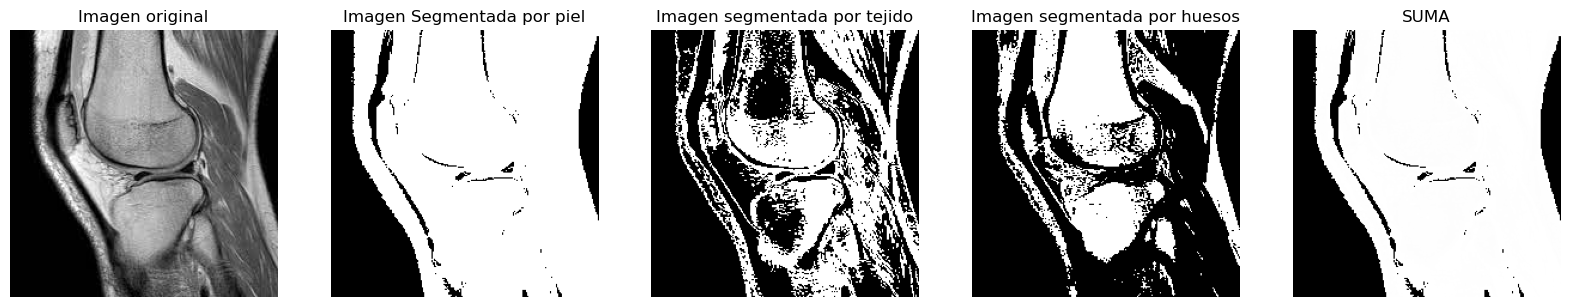

In [412]:
imagen_gris = cv2.imread('./imgs/rodilla.jfif', cv2.IMREAD_GRAYSCALE)
img_rgb = cv2.cvtColor(imagen_gris, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 5, figsize=(20, 5))

suma2 = imagen_cutanea2 + imagen_tejido2
sumatotaldetodo = suma2 + imagen_hueso2

ax[0].imshow(img_rgb)
ax[0].set_title("Imagen original")
ax[0].axis('off')

ax[1].imshow(imagen_cutanea2,cmap="gray")
ax[1].set_title("Imagen Segmentada por piel")
ax[1].axis('off')

ax[2].imshow(imagen_tejido2,cmap="gray")
ax[2].set_title("Imagen segmentada por tejido")
ax[2].axis('off')

ax[3].imshow(imagen_hueso2,cmap="gray")
ax[3].set_title("Imagen segmentada por huesos")
ax[3].axis('off')

ax[4].imshow(sumatotaldetodo, cmap="gray")
ax[4].set_title("SUMA")
ax[4].axis('off')


## CONCLUSIÓN

En esta actividad se trabajo con una resonancia magnetica en la que se muestra el area de la rotula donde se ve la union del femur, los ligamentos y musculos. Al momento de empezar a procesar la imagen con los recursos proporcionados por el profesor de clases anteriores tales como umbralizacion por rangos para determinar el area cutanea (piel), con la misma tecnica para el area de los musculos, los canales rgb se  utilizaron para determinar cual de los 3 resaltaba mejor el area osea y tras un analizis minucioso se concluyo en esta parte que el canal verde fue el que  mostro una mayor definicion del hueso, con el canal ya elegido la imagen se paso a grises para aplicarle el histograma obtener los valores para la umbralizacion. Los valores que se pusieron fueron 255 y 216 para encontrar el contorno del hueso aunque en algunas zonas se resaltaron tambien los tejidos, Después volvimos a los colores originales. En la parte de las sumas se añadieron todas las imágenes y se obtuvo como resultado. La imagen del hueso pero con anomalias, el area blanca tenia perforaciones en otro tono. Se hizo el mismo proceso pero usando umbralizacion por rangos